<a href="https://colab.research.google.com/github/Utkarsh038/DEEP_LEARN/blob/main/Text_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PreProcessing**

In [ ]:
import pandas as pd
#Initial Data
reviews =[
    "I absolutely LOVE this product!! 😍😍 It’s super efficient and really worth the money. Definitely recommend to every",
    "Worst purchase ever... Waste of money. DO NOT BUY!! 😡😡 Full of issues.",
    "This product does what it says, but nothing special. It’s okay for the price, I guess.",
    "AMAZING quality and fast shipping!!! 👍👍 #satisfied #fastdelivery",
    "Terrible! Had high expectations, but it broke in a week. Really disappointed."
]
# Convert to Data Frame
df_reviews = pd.DataFrame(reviews, columns=['Reviews'])

#LowerCase conversion to the data frame
df_reviews["Reviews_Lowercase"] = df_reviews["Reviews"].str.lower()

# Display the DataFrame

df_reviews

,Reviews,Reviews_Lowercase
0,I absolutely LOVE this product!! 😍😍 It’s super...,i absolutely love this product!! 😍😍 it’s super...
1,Worst purchase ever... Waste of money. DO NOT ...,worst purchase ever... waste of money. do not ...
2,"This product does what it says, but nothing sp...","this product does what it says, but nothing sp..."
3,AMAZING quality and fast shipping!!! 👍👍 #satis...,amazing quality and fast shipping!!! 👍👍 #satis...
4,"Terrible! Had high expectations, but it broke ...","terrible! had high expectations, but it broke ..."


In [ ]:
import re
df_reviews["Reviews_NoPunctEmoji"] = df_reviews["Reviews_Lowercase"].apply(lambda x: re.sub(r'[^\w\s]', '', x))

df_reviews

,Reviews,Reviews_Lowercase,Reviews_NoPunctEmoji
0,I absolutely LOVE this product!! 😍😍 It’s super...,i absolutely love this product!! 😍😍 it’s super...,i absolutely love this product its super effi...
1,Worst purchase ever... Waste of money. DO NOT ...,worst purchase ever... waste of money. do not ...,worst purchase ever waste of money do not buy ...
2,"This product does what it says, but nothing sp...","this product does what it says, but nothing sp...",this product does what it says but nothing spe...
3,AMAZING quality and fast shipping!!! 👍👍 #satis...,amazing quality and fast shipping!!! 👍👍 #satis...,amazing quality and fast shipping satisfied f...
4,"Terrible! Had high expectations, but it broke ...","terrible! had high expectations, but it broke ...",terrible had high expectations but it broke in...


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df_reviews["Reviews_NoStopwords"] = df_reviews["Reviews_NoPunctEmoji"].apply(lambda x: ''.join(word for word  in x.split() if word not in stop_words))
df_reviews

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Reviews,Reviews_Lowercase,Reviews_NoPunctEmoji,Reviews_NoStopwords
0,I absolutely LOVE this product!! 😍😍 It’s super...,i absolutely love this product!! 😍😍 it’s super...,i absolutely love this product its super effi...,absolutelyloveproductsuperefficientreallyworth...
1,Worst purchase ever... Waste of money. DO NOT ...,worst purchase ever... waste of money. do not ...,worst purchase ever waste of money do not buy ...,worstpurchaseeverwastemoneybuyfullissues
2,"This product does what it says, but nothing sp...","this product does what it says, but nothing sp...",this product does what it says but nothing spe...,productsaysnothingspecialokaypriceguess
3,AMAZING quality and fast shipping!!! 👍👍 #satis...,amazing quality and fast shipping!!! 👍👍 #satis...,amazing quality and fast shipping satisfied f...,amazingqualityfastshippingsatisfiedfastdelivery
4,"Terrible! Had high expectations, but it broke ...","terrible! had high expectations, but it broke ...",terrible had high expectations but it broke in...,terriblehighexpectationsbrokeweekreallydisappo...


***Tokenization***

# Tokenization

## Why Tokenization is Needed?

### 1. Turning Text into Data for Analysis
Tokenization breaks down a string of characters into recognizable parts that a computer can process. For example, the sentence:

```
"I love NLP"
```

is transformed into its components:

```
["I", "love", "NLP"]
```

This allows for efficient analysis, comparison, and computation.

### 2. Contextual Understanding
Tokenization enables models to handle words, subwords, or even individual characters meaningfully. It is crucial in applications such as:
- Machine translation
- Sentiment analysis
- Text generation

By breaking down language components accurately, tokenization helps improve model performance and understanding.

### 3. Handling Variations in Language
Natural language includes variations such as punctuation, compound words, and abbreviations. Tokenization normalizes text, enabling models to:
- Differentiate between words like *"don't"* (do + not)
- Remove unnecessary elements such as commas, which may alter meaning

## How Tokenizers Actually Work

### 1. Word Tokenizers
The simplest tokenizers separate text based on spaces. More advanced tokenizers apply linguistic rules to:
- Identify word boundaries
- Separate contractions (e.g., *"don’t"* → *["do", "n’t"]*)
- Handle punctuation effectively

### 2. Subword Tokenizers
Subword tokenization is useful for handling rare words and improving model generalization. Examples include:
- Byte Pair Encoding (BPE)
- WordPiece (used in BERT)
- SentencePiece

### 3. Character Tokenizers
These break text into individual characters, which is useful for:
- Languages without clear word boundaries (e.g., Chinese, Japanese)
- Handling misspellings or unknown words

## Conclusion
Tokenization is a fundamental preprocessing step in NLP, enabling better text analysis, machine learning performance, and language understanding. Choosing the right tokenizer depends on the specific use case and language characteristics.

In [ ]:
import nltk
nltk.download('punkt')
# Tokenize the text
from nltk.tokenize import word_tokenize
word_tokenize("I dont't like NLP")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['I', "dont't", 'like', 'NLP']

# Word Embeddings

## What are Embeddings?
Embeddings are a way to represent words (or sentences) as numerical values so that computers can understand their meanings and relationships. Similar to how students have different traits (height, hair color, favorite subject), words have different "traits" that need to be represented in a meaningful way.

## Why Do We Need Embeddings?
In traditional approaches, words were represented using methods like one-hot encoding. However, this method has several limitations:

- **No semantic meaning** – One-hot vectors do not capture relationships between words.
- **High dimensionality** – Large vocabularies make these vectors sparse and memory-intensive.

Embeddings overcome these challenges by mapping words into a lower-dimensional space where similar words have closer numerical representations.

## How Do Embeddings Work?
Let's consider a simple example using the words *"king,"* *"queen,"* *"apple,"* and *"banana."* We can represent each word using three numerical traits:

| Word   | Royalty Score | Fruitiness Score | Gender Score |
|--------|--------------|------------------|--------------|
| king   | 0.9          | 0.1              | 1 (male)     |
| queen  | 0.9          | 0.1              | 0 (female)   |
| apple  | 0.1          | 0.9              | 0.5          |
| banana | 0.1          | 0.9              | 0.5          |

Here, words are represented as numerical vectors, allowing computers to understand their relationships. For instance, *king* and *queen* have similar royalty scores but differ in gender, while *apple* and *banana* have high fruitiness scores.

## Conclusion
Word embeddings are a crucial component of Natural Language Processing (NLP), enabling machines to understand word relationships effectively. Methods such as Word2Vec, GloVe, and FastText help generate embeddings that improve tasks like text classification, sentiment analysis, and machine translation.# New Section

In [ ]:
from gensim.models import Word2Vec

# Sample text data
sentences = [
    ["king", "queen", "man", "woman"],
    ["apple", "banana", "fruit"],
    ["king", "man", "ruler"],
    ["queen", "woman", "ruler"]
]

# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=3, window=2, min_count=1, sg=1)

# Get the embedding for "king"
print("Embedding for 'king':", model.wv["king"])

# Find most similar words
print("Most similar to 'king':", model.wv.most_similar("king"))


Embedding for 'king': [-0.15122044  0.21846838 -0.16200535]
Most similar to 'king': [('queen', 0.9267786741256714), ('fruit', 0.673219621181488), ('man', 0.4754199683666229), ('apple', 0.2219998836517334), ('ruler', -0.4341561198234558), ('banana', -0.44113609194755554), ('woman', -0.4875093996524811)]


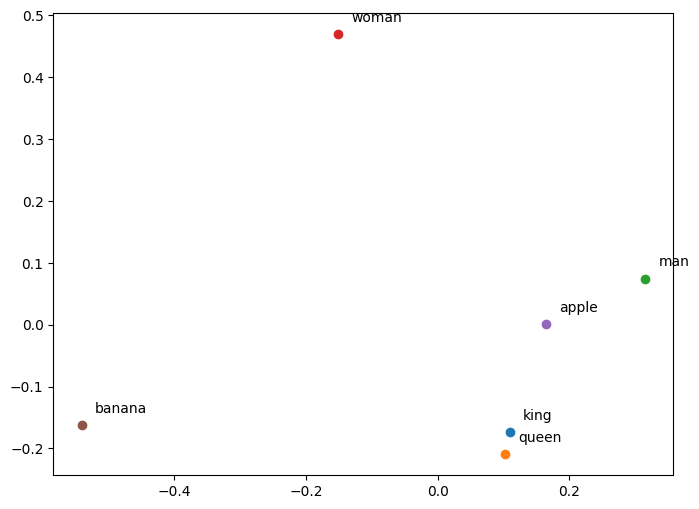

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Words to visualize
words = ["king", "queen", "man", "woman", "apple", "banana"]
word_vectors = [model.wv[word] for word in words]

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Plot words
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.text(word_vectors_2d[i, 0] + 0.02, word_vectors_2d[i, 1] + 0.02, word)

plt.show()
